In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier, forest
from sklearn.tree import DecisionTreeClassifier

In [57]:
# import precprocessed data
train = pd.read_csv("trainPreprocessed.csv")
test = pd.read_csv("testPreprocessed.csv")

In [58]:
print(train.shape,test.shape)

(354324, 300) (236216, 299)


In [ ]:
##remove transactionID from data as it is a unique feature

In [59]:
k = test['TransactionID']

In [60]:
del train['TransactionID']
del test['TransactionID']

In [61]:
y_train = train['isFraud'].copy().values

In [62]:
del train['isFraud']

In [63]:
X_train = train.copy().values

In [64]:
X_test = test.copy().values

In [ ]:
#performing  randomized search cv to find best parameters among grid for model

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rf = RandomForestClassifier(random_state = 42)

In [67]:
print(rf.get_params())# check and fill accordingly

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [68]:
param_grid = {
    'n_estimators':[200,300,400,500],
    'max_features':['auto'],
    'max_depth':[10,20,30,40,50,None],
    'class_weight':['balanced'],
    'min_samples_leaf':[10,20,30,40,50],
    'min_samples_split': [2,3,4]
}

In [69]:
CV_rfc = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=3,scoring='roc_auc',n_jobs=-1,n_iter=10,verbose=2)
CV_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 142.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [10, 20, 30, 40,
                                                             50],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [200, 300, 400, 500]},
                   scoring='roc_auc', verbose=2)

In [70]:
print(CV_rfc.best_params_)

{'n_estimators': 500, 'min_samples_split': 3, 'min_samples_leaf': 50, 'max_features': 'auto', 'max_depth': 40, 'class_weight': 'balanced'}


In [71]:
cv_result = CV_rfc.cv_results_
output = pd.DataFrame(cv_result)
output.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1095.659398,60.426536,17.726981,1.425695,400,3,10,auto,None,balanced,"{'n_estimators': 400, 'min_samples_split': 3, ...",0.866538,0.892211,0.817476,0.858742,0.031004,10
1,1270.316030,61.522934,20.264775,1.111769,500,4,30,auto,30,balanced,"{'n_estimators': 500, 'min_samples_split': 4, ...",0.864762,0.891473,0.868385,0.874873,0.011830,4
2,731.757675,45.592779,11.770445,0.705015,300,2,50,auto,40,balanced,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.862327,0.890634,0.877198,0.876720,0.011561,2
3,789.452992,34.112616,15.147973,0.902009,500,2,20,auto,10,balanced,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.854657,0.873306,0.870291,0.866084,0.008174,9
4,1292.742741,100.996714,22.027869,1.964749,500,2,20,auto,20,balanced,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.867390,0.888878,0.857564,0.871277,0.013076,7
5,916.034147,52.912763,16.806464,0.233117,500,2,10,auto,10,balanced,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.856706,0.873003,0.870597,0.866769,0.007183,8
6,1358.169701,61.784599,20.293722,1.622279,500,3,50,auto,40,balanced,"{'n_estimators': 500, 'min_samples_split': 3, ...",0.862424,0.890829,0.877885,0.877046,0.011612,1
7,1152.751384,95.444196,19.375569,3.021430,400,2,20,auto,None,balanced,"{'n_estimators': 400, 'min_samples_split': 2, ...",0.866456,0.893096,0.859422,0.872991,0.014504,6
8,1081.391231,52.431907,17.132479,0.772214,400,4,30,auto,20,balanced,"{'n_estimators': 400, 'min_samples_split': 4, ...",0.865493,0.888990,0.870380,0.874955,0.010123,3
9,1187.212804,10.210367,17.086365,0.558637,500,3,20,auto,50,balanced,"{'n_estimators': 500, 'min_samples_split': 3, ...",0.866378,0.893210,0.860761,0.873450,0.014159,5


In [ ]:
## train and test split using stratify as data is highly imbalanced

In [72]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.25,stratify = y_train)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(265743, 298) (88581, 298) (265743,) (88581,)


In [ ]:
# predicting output using decision Tree with best parameters on split data

In [73]:

model = RandomForestClassifier(n_estimators=500, min_samples_leaf=50,min_samples_split= 3,max_depth= 40, n_jobs=-1,class_weight='balanced')
model.fit(X_train1, y_train1)  

RandomForestClassifier(class_weight='balanced', max_depth=40,
                       min_samples_leaf=50, min_samples_split=3,
                       n_estimators=500, n_jobs=-1)

In [74]:
predprobs = model.predict_proba(X_test1)
predprobs = predprobs[:,1]

In [ ]:
# plotting Roc curve

Random Trees: ROC AUC=0.908


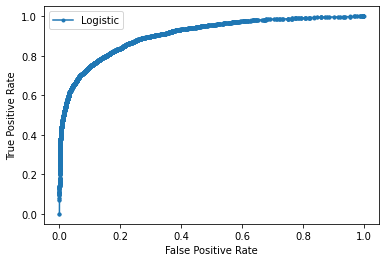

In [75]:
lr_auc = roc_auc_score(y_test1, predprobs)
# summarize scores

print('Random Trees: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test1, predprobs)
# plot the roc curve for the model

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# predicting output using entire training dataset using best parameters

In [76]:
predprobs = CV_rfc.predict_proba(X_test)
predprobs = predprobs[:,1]

In [77]:
submission = pd.DataFrame({'TransactionID':k,'isFraud':predprobs})
submission.head()

,TransactionID,isFraud
0,2987000,0.415088
1,2987001,0.256669
2,2987004,0.041147
3,2987007,0.286950
4,2987009,0.182346


In [78]:
filename = 'new_sub4.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: new_sub4.csv


In [ ]:
## output --- roc curve on test data == 0.908